# Trafic Light Classificator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline

In [4]:
fig = plt.figure()


## 1. Data Import

In [5]:
X_train = []
x_label = []
for img_class, directory in enumerate(['red', 'yellow', 'green', 'none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)

        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,64))

        X_train.append(resized/255.)
        x_label.append(img_class)
        
        #if (i < 3):
        #    plt.imshow(rgb)
        #    plt.show()
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [6]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 2. CNN

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [8]:
categorical_labels = to_categorical(x_label)

In [9]:
num_classes = 4
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Flatten())

#model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [11]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [12]:
model.fit(X_train, categorical_labels, batch_size=32, epochs=10, verbose=True, validation_split=0.1, shuffle=True)

Train on 330 samples, validate on 37 samples
Epoch 1/10
330/330 [==============================] - 0s - loss: 1.6448 - acc: 0.3424 - val_loss: 1.8597 - val_acc: 0.0000e+00
Epoch 2/10
330/330 [==============================] - 0s - loss: 1.3651 - acc: 0.4727 - val_loss: 2.4655 - val_acc: 0.0000e+00
Epoch 3/10
330/330 [==============================] - 0s - loss: 1.0544 - acc: 0.6939 - val_loss: 2.3145 - val_acc: 0.0000e+00
Epoch 4/10
330/330 [==============================] - 0s - loss: 0.8383 - acc: 0.7455 - val_loss: 2.0328 - val_acc: 0.0000e+00
Epoch 5/10
330/330 [==============================] - 0s - loss: 0.6622 - acc: 0.8061 - val_loss: 1.9313 - val_acc: 0.0000e+00
Epoch 6/10
330/330 [==============================] - 0s - loss: 0.5628 - acc: 0.8848 - val_loss: 1.9637 - val_acc: 0.0270
Epoch 7/10
330/330 [==============================] - 0s - loss: 0.4777 - acc: 0.9061 - val_loss: 1.9638 - val_acc: 0.1081
Epoch 8/10
330/330 [==============================] - 0s - loss: 0.3871 - 

In [13]:
score = model.evaluate(X_train, categorical_labels, verbose=0)

In [14]:
print(score)

[0.5029275748645252, 0.8746594008291775]


In [15]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

320/367 [=========================>....] - ETA: 0s0 [9.9670058e-01 1.3424919e-04 5.3665346e-05 3.1115019e-03] [1. 0. 0. 0.]
1 [0.9711586  0.00458834 0.00112115 0.02313187] [1. 0. 0. 0.]
2 [9.9057746e-01 3.3716488e-04 2.1010428e-05 9.0644248e-03] [1. 0. 0. 0.]
3 [9.9528342e-01 4.2881680e-04 6.3563166e-05 4.2241951e-03] [1. 0. 0. 0.]
4 [9.7014284e-01 3.1841109e-03 6.7046960e-05 2.6605941e-02] [1. 0. 0. 0.]
5 [9.88383114e-01 1.16711750e-03 8.78205719e-06 1.04408935e-02] [1. 0. 0. 0.]
6 [0.37219888 0.11582977 0.23956813 0.27240318] [1. 0. 0. 0.]
7 [0.730309   0.08252031 0.09010472 0.09706597] [1. 0. 0. 0.]
8 [0.5578431  0.09119952 0.12145755 0.22949985] [1. 0. 0. 0.]
9 [0.5509352  0.07576776 0.11326472 0.26003233] [1. 0. 0. 0.]
10 [9.9725926e-01 3.5878603e-04 4.5365639e-04 1.9282234e-03] [1. 0. 0. 0.]
11 [9.6372819e-01 4.7318949e-04 1.0647882e-02 2.5150733e-02] [1. 0. 0. 0.]
12 [0.9855672  0.00108001 0.00792627 0.00542649] [1. 0. 0. 0.]
13 [9.7501695e-01 3.6371159e-04 2.1237925e-02 3.38137

293 [0.34083572 0.11290836 0.20629197 0.33996385] [0. 0. 0. 1.]
294 [0.49893323 0.0566694  0.09502774 0.3493696 ] [0. 0. 0. 1.]
295 [0.00953071 0.01623485 0.94097304 0.03326134] [0. 0. 0. 1.]
296 [0.09268208 0.01258247 0.16843522 0.72630024] [0. 0. 0. 1.]
297 [0.26604655 0.02008052 0.17173399 0.54213893] [0. 0. 0. 1.]
298 [0.20895162 0.06813651 0.08442413 0.63848776] [0. 0. 0. 1.]
299 [0.3374478  0.06645045 0.06881021 0.5272916 ] [0. 0. 0. 1.]
300 [0.15855925 0.02549129 0.04633135 0.7696181 ] [0. 0. 0. 1.]
301 [0.04515143 0.00340014 0.64830685 0.30314156] [0. 0. 0. 1.]
302 [0.02244139 0.03188162 0.06530623 0.88037074] [0. 0. 0. 1.]
303 [0.15457264 0.17268835 0.17199264 0.5007464 ] [0. 0. 0. 1.]
304 [0.04724836 0.08813409 0.07427023 0.7903473 ] [0. 0. 0. 1.]
305 [0.0318852  0.06321585 0.05802988 0.84686905] [0. 0. 0. 1.]
306 [0.01347485 0.01858431 0.02739141 0.94054943] [0. 0. 0. 1.]
307 [0.0107647  0.03214524 0.04728654 0.90980357] [0. 0. 0. 1.]
308 [0.0141757  0.01669572 0.03228187 0.

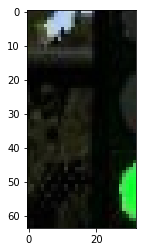

In [18]:
plt.imshow(X_train[183])

In [17]:
import h5py
model.save('classifier_sim.h5')

In [17]:
prediction[46]

array([9.9578589e-01, 1.3313984e-04, 7.4636372e-04, 3.3345884e-03],
      dtype=float32)

In [18]:
prediction[46].tolist()

[0.9957858920097351,
 0.00013313983799889684,
 0.0007463637157343328,
 0.003334588371217251]

In [19]:
prediction[46].tolist().index

<function list.index>

In [20]:
prediction[46].tolist().index(np.max(prediction[46]))

0

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (64, 32, 3)

In [26]:
np.shape(X_train[0].reshape(1,64,32,3))

(1, 64, 32, 3)

In [27]:
test = model.predict(X_train[0].reshape(1,64,32,3), verbose=1)


1/1 [==============================] - 0s 2ms/step


In [29]:
test[0].tolist().index(np.max(test[0]))


0

In [30]:
test[0]


array([9.9707139e-01, 7.5927004e-05, 1.4111120e-04, 2.7115915e-03],
      dtype=float32)

In [31]:
max(test[0])

0.9970714

In [35]:
test[0].tolist().index(min(test[0]))

1